Analysis 2:   
Does higher energy consumption affect life expectancy (broken down by continents)?

In [23]:
# Import Dependencies

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt

In [24]:
# Make a reference to the csv file path
csv_path = Path("energyLEclean_NA.csv")

# Import the csv file as a DataFrame
data_df = pd.read_csv(csv_path)

# Check the df
data_df.head()

,Unnamed: 0,Location,Year,population,fossil_energy_per_capita,renewables_energy_per_capita,energy_per_capita,Record Counter,LEx,LE15,LE65,LE80
0,87,Africa,1965,321447378.0,2100.505,127.918,2228.423,27,43.4401,45.7137,11.2665,4.9844
1,88,Africa,1966,329658389.0,2136.364,139.123,2275.487,27,43.4330,45.6340,11.2447,4.9787
2,89,Africa,1967,338159967.0,2099.772,141.577,2241.349,27,43.6456,45.5410,11.2492,4.9786
3,90,Africa,1968,346980412.0,2145.930,161.394,2307.324,27,44.1023,45.8270,11.3158,4.9931
4,91,Africa,1969,356070643.0,2126.871,183.537,2310.408,27,44.3156,45.8841,11.3276,4.9919


In [25]:
# Reduce df to only columns needed for this analysis
reduced_df = data_df[["Year", "Location", "energy_per_capita", "LEx","LE15", "LE65", "LE80"]]
reduced_df.head()

,Year,Location,energy_per_capita,LEx,LE15,LE65,LE80
0,1965,Africa,2228.423,43.4401,45.7137,11.2665,4.9844
1,1966,Africa,2275.487,43.4330,45.6340,11.2447,4.9787
2,1967,Africa,2241.349,43.6456,45.5410,11.2492,4.9786
3,1968,Africa,2307.324,44.1023,45.8270,11.3158,4.9931
4,1969,Africa,2310.408,44.3156,45.8841,11.3276,4.9919


In [26]:
# Looking at 2021 by continent, country, income groupings
#reduced_df.loc[reduced_df["Location"].isin(['Africa', 'Antarctica', 'Asia','Europe','North America','Oceana','South America'])]

new_df = reduced_df.loc[reduced_df["Location"].isin(['Africa', 'Antarctica', 'Asia','Europe','North America','Oceania','South America'])]
#new_df.head()
one_year_df = new_df[(new_df['Year'] == 2021)]
one_year_df.head(10)

,Year,Location,energy_per_capita,LEx,LE15,LE65,LE80
56,2021,Africa,4027.117,61.6609,52.1976,12.5590,5.5959
230,2021,Asia,18812.572,72.5321,59.8141,15.9106,7.4329
1198,2021,Europe,40415.152,77.0336,62.4324,17.7173,8.3612
2411,2021,North America,54584.871,77.7299,63.2922,19.2612,9.5845
2541,2021,Oceania,41087.691,79.4444,66.2845,20.4808,9.7762
3085,2021,South America,16192.434,72.9158,59.1581,16.0654,7.1328


In [27]:
# Columns for 2021 by continent
# setting up columns for 2021 df energy by continent
continents = one_year_df["Location"]
LEx = one_year_df["LEx"]

energy_per_capita = one_year_df['energy_per_capita']




C:\Users\kyleb\AppData\Local\Temp\ipykernel_32332\2972349281.py:1: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  plt.bar(continents[0:5], energy_per_capita[0:5])


<function matplotlib.pyplot.show(close=None, block=None)>

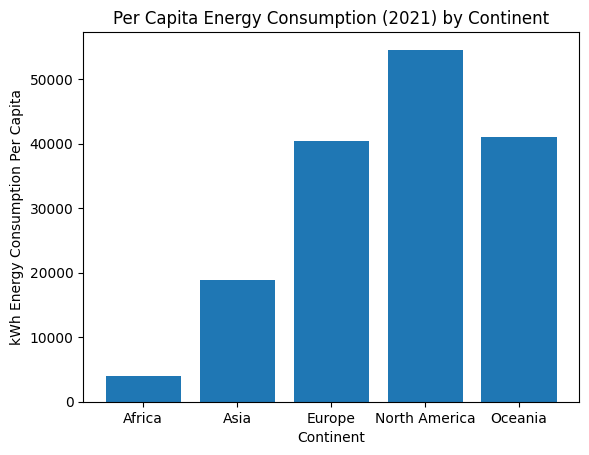

In [28]:
plt.bar(continents[0:5], energy_per_capita[0:5])
plt.title("Per Capita Energy Consumption (2021) by Continent")
plt.ylabel("kWh Energy Consumption Per Capita")
plt.xlabel("Continent")
plt.show

C:\Users\kyleb\AppData\Local\Temp\ipykernel_32332\1611086894.py:1: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  plt.bar(continents[0:5], LEx[0:5])


<function matplotlib.pyplot.show(close=None, block=None)>

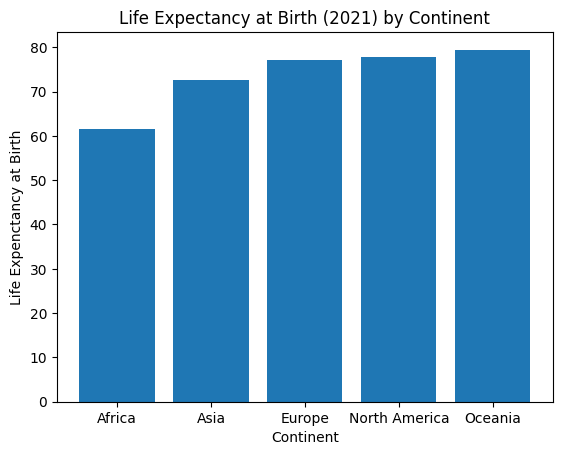

In [29]:

plt.bar(continents[0:5], LEx[0:5])
plt.title("Life Expectancy at Birth (2021) by Continent")
plt.ylabel("Life Expenctancy at Birth")
plt.xlabel("Continent")
plt.show

In [30]:
# Looking at 1965 by continent, country, income groupings
#reduced_df.loc[reduced_df["Location"].isin(['Africa', 'Antarctica', 'Asia','Europe','North America','Oceana','South America'])]

new_df = reduced_df.loc[reduced_df["Location"].isin(['Africa', 'Antarctica', 'Asia','Europe','North America','Oceania','South America'])]
#new_df.head()
two_year_df = new_df[(new_df['Year'] == 1965)]
two_year_df.head(10)

,Year,Location,energy_per_capita,LEx,LE15,LE65,LE80
0,1965,Africa,2228.423,43.4401,45.7137,11.2665,4.9844
174,1965,Asia,2816.082,50.5795,48.2289,11.1161,4.8483
1142,1965,Europe,30301.293,69.7955,57.9409,14.3409,6.1746
2355,1965,North America,56296.660,70.3669,57.6278,14.7463,6.7945
2485,1965,Oceania,29017.244,65.8003,55.8474,13.9786,6.3733
3029,1965,South America,6260.950,56.9341,52.4490,12.9996,5.4895


In [31]:
# Columns for 2021 by continent
# setting up columns for 2021 df energy by continent
continents = two_year_df["Location"]
LEx = two_year_df["LEx"]

energy_per_capita = two_year_df['energy_per_capita']

C:\Users\kyleb\AppData\Local\Temp\ipykernel_32332\2835248157.py:1: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  plt.bar(continents[0:5], energy_per_capita[0:5])


<function matplotlib.pyplot.show(close=None, block=None)>

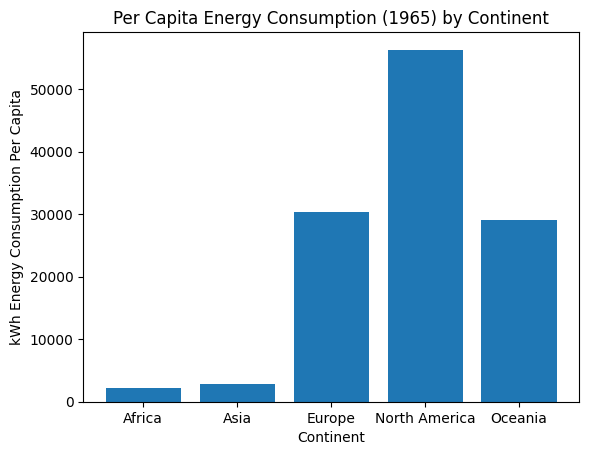

In [32]:
plt.bar(continents[0:5], energy_per_capita[0:5])
plt.title("Per Capita Energy Consumption (1965) by Continent")
plt.ylabel("kWh Energy Consumption Per Capita")
plt.xlabel("Continent")
plt.show

C:\Users\kyleb\AppData\Local\Temp\ipykernel_32332\3837226986.py:1: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  plt.bar(continents[0:5], LEx[0:5])


<function matplotlib.pyplot.show(close=None, block=None)>

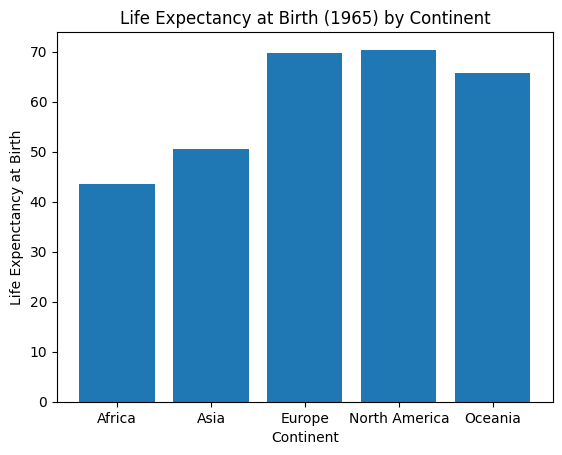

In [33]:
plt.bar(continents[0:5], LEx[0:5])
plt.title("Life Expectancy at Birth (1965) by Continent")
plt.ylabel("Life Expenctancy at Birth")
plt.xlabel("Continent")
plt.show